In [1]:
import numpy as np
import pandas as pd

In [2]:
datapath = './data/diagnosis.data'

#original_data = pd.read_csv(datapath, sep='\t') # 인코딩으로 인해 오류
#original_data.shape

In [3]:
datapath = './data/diagnosis2.data'

original_data = pd.read_csv(datapath, sep='\t') # 인코딩 강제 변환 후 실행
original_data.shape

# datapath = './data/diagnosis.data'

# original_data = pd.read_csv(datapath, sep='\t', encoding ='utf-16') # 인코딩으로 인해 오류없음
# original_data.shape

(119, 8)

In [4]:
original_data.columns # 컬럼이 지정되어 있지 않음

Index(['35,5', 'no', 'yes', 'no.1', 'no.2', 'no.3', 'no.4', 'no.5'], dtype='object')

In [5]:
datapath = './data/diagnosis2.data'

original_data = pd.read_csv(datapath, sep='\t', names =['temperature', 'nausea','lumbar_pain','urine_pushin',
                                                       'micturition_pains','burning_of_urethra','inflamation','nephritis']) # 인코딩 강제 변환 후 실행

original_data.shape

(120, 8)

In [6]:
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushin,micturition_pains,burning_of_urethra,inflamation,nephritis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [7]:
original_data['temperature'] = original_data['temperature'].apply(lambda x : x.replace(',','.'))
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushin,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [8]:
from sklearn import preprocessing

le_nausea = preprocessing.LabelEncoder() # string data to real number
le_nausea.fit(original_data['nausea'])   # nausea 컬럼에 대하여 Label Encoder를 fit했음. 앞으로 no, yes만 받음!

print(le_nausea.classes_) # fit 한 class들 출력
print(le_nausea.transform(['no','yes','yes'])) # 변환 실험
print(le_nausea.inverse_transform([0,0,1])) # transform에 대한 반대 출력

print(type(le_nausea.transform(['no','yes','yes']))) # numpy로 찍힘, 


['no' 'yes']
[0 1 1]
['no' 'no' 'yes']
<class 'numpy.ndarray'>


In [9]:
type(le_nausea)

sklearn.preprocessing.label.LabelEncoder

In [10]:
dicted_data = original_data.copy()
dicted_data['nausea'] = le_nausea.transform(original_data['nausea'])

dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushin,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,yes,no,no,no,no,no
1,35.9,0,no,yes,yes,yes,yes,no
2,35.9,0,yes,no,no,no,no,no
3,36.0,0,no,yes,yes,yes,yes,no
4,36.0,0,yes,no,no,no,no,no


In [11]:
# 모든 컬럼에 대하여 레이블 인코딩 변환
tmp = ['lumbar_pain','urine_pushin','micturition_pains','burning_of_urethra','inflamation','nephritis']

les = {'nausea' : le_nausea}

for x in tmp : # 벡터로 연결받아 한번에 전환
    les[x] = preprocessing.LabelEncoder() # 변환
    dicted_data[x] = les[x].fit_transform(original_data[x]) # 변환하여 반환

    
dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushin,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [12]:
print(les)

{'nausea': LabelEncoder(), 'lumbar_pain': LabelEncoder(), 'urine_pushin': LabelEncoder(), 'micturition_pains': LabelEncoder(), 'burning_of_urethra': LabelEncoder(), 'inflamation': LabelEncoder(), 'nephritis': LabelEncoder()}


In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y = dicted_data['inflamation']

features = ['temperature']
x = dicted_data[features]

model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)



In [14]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: inflamation, dtype: int64

In [15]:
x.head()

,temperature
0,35.5
1,35.9
2,35.9
3,36.0
4,36.0


In [16]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

['no' 'yes']


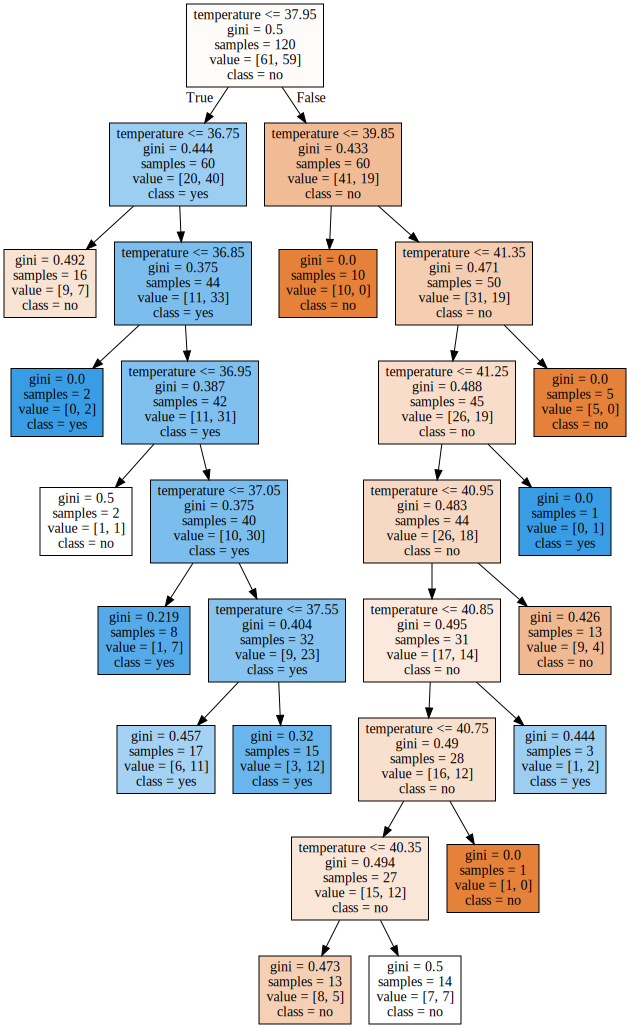

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

inlatmation_labels = les['inflamation'].classes_
print(inlatmation_labels)

graph = Source(tree.export_graphviz(model, out_file = None, \
                                   feature_names = features, class_names = inlatmation_labels, \
                                   filled = True))

display(SVG(graph.pipe(format ='svg')))

In [31]:
pred_y = model.predict(x) # predict를 통해 예측해봄. pred_y
pred_y_prob = model.predict_proba(x) # 확률값으로 가져옴. pred_y_prob


print(np.shape(pred_y))
print(np.shape(pred_y_prob))
print("================================================================================")
print(pred_y)
print(pred_y_prob)

(120,)
(120, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
[[0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.         1.        ]
 [0.         1.        ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.125      0.875     ]
 [0.35294118 0.64705882]
 [0.35294118 0

In [26]:
# 하나하나 찍어보기 
print("정답 : ", y[0])
print("예측 : ", pred_y[0])
print("확률 : ", pred_y_prob[0])
print(model.classes_)

정답 :  0
예측 :  0
확률 :  [0.5625 0.4375]
[0 1]


In [28]:
mean_accuracy = model.score(x,y) # accuracy 인지 recall인지 precision인지 모른다. score의 returne 값 알아보기.
print(mean_accuracy)

0.7083333333333334


In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y = dicted_data['inflamation']

features = ['temperature', 'nausea','lumbar_pain','urine_pushin','micturition_pains','burning_of_urethra']
x = dicted_data[features]

model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)

In [35]:
model.fit(x,y)
mean_accuracy = model.score(x,y)
print(mean_accuracy)

# 100%이지만, 학습한 것으로 정확도를 평가했기에 100% 였던 것

1.0


In [36]:
# 피쳐 기여도(Feature importance) intuitive한 그래프로 출력 가능. -> Explanable 하다 (설명가능하다)
print(features)
print(model.feature_importances_)

['temperature', 'nausea', 'lumbar_pain', 'urine_pushin', 'micturition_pains', 'burning_of_urethra']
[0.22586919 0.         0.         0.48360656 0.29052425 0.        ]


In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y = dicted_data['inflamation']

features = ['urine_pushin']
x = dicted_data[features]

model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)

model.fit(x,y)
mean_accuracy = model.score(x,y)
print(mean_accuracy)

# 가장 피쳐 기여도가 높은 변수를 사용했더니 82.5%가 나옴.

0.825


In [42]:
# 지금까지 우리는 정확도 100%가 나왔는데, 이는 학습데이터에 대한 정확도임. 따라서 unseen한 데이터에 대한 평가가 필요함.
# 데이터를 학습용, 테스트용으로 나눠 사용한다.

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

features = ['temperature', 'nausea','lumbar_pain','urine_pushin','micturition_pains','burning_of_urethra']

train_d, test_d = train_test_split(dicted_data, test_size = 0.1)

train_y = train_d['inflamation']
train_x = train_d[features]

test_y = test_d['inflamation']
test_x = test_d[features]

In [50]:
# 모델 구축
model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99) # min_samples_split이 크면 tree가 커짐, 과적합 위험!
model.fit(train_x,train_y)

# 학습데이터 평가
mean_accuracy_fot_train = model.score(train_x, train_y)
print(mean_accuracy_fot_train)

# 테스트 데이터 평가
mean_accuracy_for_test = model.score(test_x, test_y)
print(mean_accuracy_for_test)

# train과 test에 대한 차이가 적으면 오버피팅이 적고, 모델이 generazation이 잘 되었다라고 할수있다
# 반면 격차가 크면 그 반대 !

1.0
1.0


In [ ]:
# -메모- 정석
# training / test 데이터에서 training + validation + test 데이터 3가지로 나눔
# 절대 test set으로 하는 것이 아니라 training으로 n-fold cross validation으로 하는 것 


In [52]:
import pickle # 모델의 구조와 파라미터들을 파일에 저장 
modelpath = './prac001.model'

with open(modelpath, 'wb') as f: # mode = wb, write binary
    pickle.dump(model, f)         # dump 저장  

In [56]:
modelpath = './prac001.model'

with open(modelpath, 'rb') as f: # mode = read 
    model_loaded = pickle.load(f)
    
mean_accuracy_for_test = model_loaded.score(test_x, test_y)
print(mean_accuracy_for_test)

EOFError: Ran out of input